<a href="https://colab.research.google.com/github/Felipepa9/MADSI/blob/main/Seccion_2_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

IMPORTACIÓN DEL DATASET

In [3]:
data = pd.read_csv('/content/drive/MyDrive/MOD. Y SIST. INTELIGENTES/Seccion_2.csv')
data.head()

,origin_leg_airport_iata_code,destination_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,BOG,MIA,A320,480,6679,463,3
1,BOG,MIA,A320,384,6707,618,3
2,BOG,MIA,A320,288,6922,938,3
3,BOG,MIA,A320,480,7456,1079,3
4,BOG,MIA,A320,480,7604,549,3


PREPARACIÓN DE LOS DATOS

In [4]:
data.describe()

,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
count,6141.000000,6141.000000,6141.000000,6141.000000
mean,594.869728,24883.396027,1199.942843,2.140205
std,168.563712,13183.490634,1246.855397,0.509883
min,200.000000,6679.000000,0.000000,1.000000
25%,475.000000,15373.000000,0.000000,2.000000
50%,560.000000,16923.000000,1045.000000,2.000000
75%,800.000000,41491.000000,1831.000000,2.000000
max,1200.000000,58901.000000,28994.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   origin_leg_airport_iata_code       6141 non-null   object
 1   destination_leg_airport_iata_code  6141 non-null   object
 2   business_type                      6141 non-null   object
 3   taxi_fuel_kg_qty                   6141 non-null   int64 
 4   trip_fuel_kg_qty                   6141 non-null   int64 
 5   extra_fuel_kg_qty                  6141 non-null   int64 
 6   fuel_profitability                 6141 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 336.0+ KB


In [6]:
data.loc[data['origin_leg_airport_iata_code'] == 'BOG', 'origin_leg_airport_iata_code'] = 1
data.loc[data['origin_leg_airport_iata_code'] == 'LIM', 'origin_leg_airport_iata_code'] = 2
data.loc[data['origin_leg_airport_iata_code'] == 'SCL', 'origin_leg_airport_iata_code'] = 3

data['origin_leg_airport_iata_code'] = pd.to_numeric(data['origin_leg_airport_iata_code'], errors='coerce').astype('Int64')

data.head()

,origin_leg_airport_iata_code,destination_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,1,MIA,A320,480,6679,463,3
1,1,MIA,A320,384,6707,618,3
2,1,MIA,A320,288,6922,938,3
3,1,MIA,A320,480,7456,1079,3
4,1,MIA,A320,480,7604,549,3


In [7]:
data = data.drop('destination_leg_airport_iata_code', axis=1)
data.head()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,1,A320,480,6679,463,3
1,1,A320,384,6707,618,3
2,1,A320,288,6922,938,3
3,1,A320,480,7456,1079,3
4,1,A320,480,7604,549,3


In [8]:
data['business_type'] = data['business_type'].astype(str).str.replace('A', '', regex=False).str.replace('B', '', regex=False)
data['business_type'] = pd.to_numeric(data['business_type'], errors='coerce').astype('Int64')

data.head()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,1,320,480,6679,463,3
1,1,320,384,6707,618,3
2,1,320,288,6922,938,3
3,1,320,480,7456,1079,3
4,1,320,480,7604,549,3


RECONOCIMIENTO DEL DATASET



In [9]:
data.describe()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
count,6141.0,6141.0,6141.000000,6141.000000,6141.000000,6141.000000
mean,1.784237,699.587852,594.869728,24883.396027,1199.942843,2.140205
std,0.863776,160.826931,168.563712,13183.490634,1246.855397,0.509883
min,1.0,320.0,200.000000,6679.000000,0.000000,1.000000
25%,1.0,763.0,475.000000,15373.000000,0.000000,2.000000
50%,1.0,763.0,560.000000,16923.000000,1045.000000,2.000000
75%,3.0,763.0,800.000000,41491.000000,1831.000000,2.000000
max,3.0,789.0,1200.000000,58901.000000,28994.000000,3.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   origin_leg_airport_iata_code  6141 non-null   Int64
 1   business_type                 6141 non-null   Int64
 2   taxi_fuel_kg_qty              6141 non-null   int64
 3   trip_fuel_kg_qty              6141 non-null   int64
 4   extra_fuel_kg_qty             6141 non-null   int64
 5   fuel_profitability            6141 non-null   int64
dtypes: Int64(2), int64(4)
memory usage: 300.0 KB


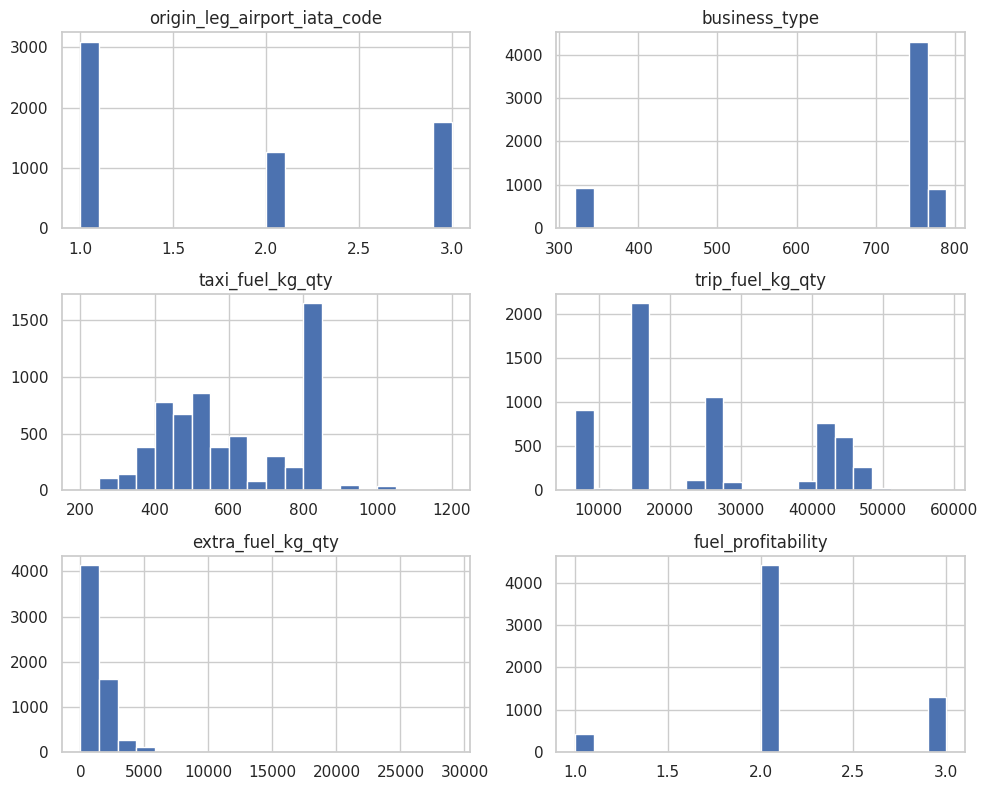

In [11]:
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

FORMULACIÓN DEL MODELO

In [12]:
feature_names = data.columns[:5].tolist()
feature_names

['origin_leg_airport_iata_code',
 'business_type',
 'taxi_fuel_kg_qty',
 'trip_fuel_kg_qty',
 'extra_fuel_kg_qty']

In [13]:
data['TIPO_RENTAB'] = data['fuel_profitability'].map({
        1: 'baja',
        2: 'media',
        3: 'alta'
    })

data.head()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability,TIPO_RENTAB
0,1,320,480,6679,463,3,alta
1,1,320,384,6707,618,3,alta
2,1,320,288,6922,938,3,alta
3,1,320,480,7456,1079,3,alta
4,1,320,480,7604,549,3,alta


In [14]:
    X = data[feature_names]
    y = data['fuel_profitability']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

    print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras.")
    print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras.")
    print(f"\nDimensiones: X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

Tamaño del conjunto de entrenamiento: 4912 muestras.
Tamaño del conjunto de prueba: 1229 muestras.

Dimensiones: X_train: (4912, 5), y_train: (4912,), X_test: (1229, 5), y_test: (1229,)


In [15]:
    num_features = X_train.shape[1]

    num_classes = len(y_train.unique())

    y_train_encoded = to_categorical(y_train - 1, num_classes=num_classes)
    y_test_encoded = to_categorical(y_test - 1, num_classes=num_classes)

    l2_lambda=0.004
    dropout_rate=0.3

    model = Sequential([
        Dense(5, activation='relu', input_shape=(num_features,), kernel_regularizer=regularizers.l2(l2_lambda)),

        Dropout(dropout_rate),
        Dense(4, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),

        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])

    from tensorflow.keras.optimizers import Adam

    optimizer = Adam(learning_rate=0.0001)

    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    print("\nResumen del modelo:")
    model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Resumen del modelo:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69 (276.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4456 - loss: 355.8511
Epoch 1: val_loss improved from inf to 2.05608, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4640 - loss: 329.8800 - val_accuracy: 0.7253 - val_loss: 2.0561 - learning_rate: 0.0010
Epoch 2/250
47/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6076 - loss: 103.5958
Epoch 2: val_loss improved from 2.05608 to 1.08825, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6053 - loss: 94.0764 - val_accuracy: 0.7253 - val_loss: 1.0883 - learning_rate: 0.0010
Epoch 3/250
60/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6957 - loss: 2.6352
Epoch 3: val_loss improved from 1.08825 to 1.00534, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6960 - loss: 2.6001 - val_accuracy: 0.7253 - val_loss: 1.0053 - learning_rate: 0.0010
Epoch 4/250
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7131 - loss: 1.4460
Epoch 4: val_loss improved from 1.00534 to 0.96774, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7128 - loss: 1.3861 - val_accuracy: 0.7253 - val_loss: 0.9677 - learning_rate: 0.0010
Epoch 5/250
56/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7191 - loss: 1.1350
Epoch 5: val_loss improved from 0.96774 to 0.93516, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7189 - loss: 1.1312 - val_accuracy: 0.7253 - val_loss: 0.9352 - learning_rate: 0.0010
Epoch 6/250
56/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7190 - loss: 0.9869
Epoch 6: val_loss improved from 0.93516 to 0.90763, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7188 - loss: 0.9947 - val_accuracy: 0.7253 - val_loss: 0.9076 - learning_rate: 0.0010
Epoch 7/250
56/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7203 - loss: 0.9912
Epoch 7: val_loss improved from 0.90763 to 0.88417, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7201 - loss: 0.9872 - val_accuracy: 0.7253 - val_loss: 0.8842 - learning_rate: 0.0010
Epoch 8/250
51/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7208 - loss: 0.9507
Epoch 8: val_loss improved from 0.88417 to 0.86435, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7207 - loss: 0.9475 - val_accuracy: 0.7253 - val_loss: 0.8644 - learning_rate: 0.0010
Epoch 9/250
53/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7222 - loss: 0.8869
Epoch 9: val_loss improved from 0.86435 to 0.84769, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7221 - loss: 0.8858 - val_accuracy: 0.7253 - val_loss: 0.8477 - learning_rate: 0.0010
Epoch 10/250
59/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7213 - loss: 0.8684
Epoch 10: val_loss improved from 0.84769 to 0.83383, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7212 - loss: 0.8681 - val_accuracy: 0.7253 - val_loss: 0.8338 - learning_rate: 0.0010
Epoch 11/250
46/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7215 - loss: 0.8491
Epoch 11: val_loss improved from 0.83383 to 0.82224, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7215 - loss: 0.8488 - val_accuracy: 0.7253 - val_loss: 0.8222 - learning_rate: 0.0010
Epoch 12/250
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7212 - loss: 0.8411
Epoch 12: val_loss improved from 0.82224 to 0.81254, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7212 - loss: 0.8374 - val_accuracy: 0.7253 - val_loss: 0.8125 - learning_rate: 0.0010
Epoch 13/250
58/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7212 - loss: 0.8290
Epoch 13: val_loss improved from 0.81254 to 0.80443, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7210 - loss: 0.8281 - val_accuracy: 0.7253 - val_loss: 0.8044 - learning_rate: 0.0010
Epoch 14/250
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7211 - loss: 0.8163
Epoch 14: val_loss improved from 0.80443 to 0.79764, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7210 - loss: 0.8134 - val_accuracy: 0.7253 - val_loss: 0.7976 - learning_rate: 0.0010
Epoch 15/250
47/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7211 - loss: 0.8078
Epoch 15: val_loss improved from 0.79764 to 0.79194, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7210 - loss: 0.8057 - val_accuracy: 0.7253 - val_loss: 0.7919 - learning_rate: 0.0010
Epoch 16/250
43/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7211 - loss: 0.7928
Epoch 16: val_loss improved from 0.79194 to 0.78714, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7210 - loss: 0.7920 - val_accuracy: 0.7253 - val_loss: 0.7871 - learning_rate: 0.0010
Epoch 17/250
59/62 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7211 - loss: 0.7874
Epoch 17: val_loss improved from 0.78714 to 0.78311, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7210 - loss: 0.7874 - val_accuracy: 0.7253 - val_loss: 0.7831 - learning_rate: 0.0010
Epoch 18/250
53/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7212 - loss: 0.7836
Epoch 18: val_loss improved from 0.78311 to 0.77971, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7210 - loss: 0.7832 - val_accuracy: 0.7253 - val_loss: 0.7797 - learning_rate: 0.0010
Epoch 19/250
60/62 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7211 - loss: 0.7792
Epoch 19: val_loss improved from 0.77971 to 0.77685, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7210 - loss: 0.7792 - val_accuracy: 0.7253 - val_loss: 0.7768 - learning_rate: 0.0010
Epoch 20/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7211 - loss: 0.7776
Epoch 20: val_loss improved from 0.77685 to 0.77444, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7210 - loss: 0.7776 - val_accuracy: 0.7253 - val_loss: 0.7744 - learning_rate: 0.0010
Epoch 21/250
56/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7212 - loss: 0.7737
Epoch 21: val_loss improved from 0.77444 to 0.77241, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7210 - loss: 0.7735 - val_accuracy: 0.7253 - val_loss: 0.7724 - learning_rate: 0.0010
Epoch 22/250
52/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7212 - loss: 0.7717
Epoch 22: val_loss improved from 0.77241 to 0.77071, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7210 - loss: 0.7712 - val_accuracy: 0.7253 - val_loss: 0.7707 - learning_rate: 0.0010
Epoch 23/250
56/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7212 - loss: 0.7688
Epoch 23: val_loss improved from 0.77071 to 0.76929, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7210 - loss: 0.7686 - val_accuracy: 0.7253 - val_loss: 0.7693 - learning_rate: 0.0010
Epoch 24/250
60/62 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7211 - loss: 0.7684
Epoch 24: val_loss improved from 0.76929 to 0.76811, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7210 - loss: 0.7684 - val_accuracy: 0.7253 - val_loss: 0.7681 - learning_rate: 0.0010
Epoch 25/250
59/62 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7211 - loss: 0.7662
Epoch 25: val_loss improved from 0.76811 to 0.76712, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7210 - loss: 0.7661 - val_accuracy: 0.7253 - val_loss: 0.7671 - learning_rate: 0.0010
Epoch 26/250
58/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7212 - loss: 0.7650
Epoch 26: val_loss improved from 0.76712 to 0.76631, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7210 - loss: 0.7648 - val_accuracy: 0.7253 - val_loss: 0.7663 - learning_rate: 0.0010
Epoch 27/250
42/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7211 - loss: 0.7652
Epoch 27: val_loss improved from 0.76631 to 0.76565, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7210 - loss: 0.7638 - val_accuracy: 0.7253 - val_loss: 0.7656 - learning_rate: 0.0010
Epoch 28/250
59/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7211 - loss: 0.7630
Epoch 28: val_loss improved from 0.76565 to 0.76511, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7210 - loss: 0.7629 - val_accuracy: 0.7253 - val_loss: 0.7651 - learning_rate: 0.0010
Epoch 29/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7211 - loss: 0.7627
Epoch 29: val_loss improved from 0.76511 to 0.76468, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7210 - loss: 0.7626 - val_accuracy: 0.7253 - val_loss: 0.7647 - learning_rate: 0.0010
Epoch 30/250
59/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7211 - loss: 0.7615
Epoch 30: val_loss improved from 0.76468 to 0.76435, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7210 - loss: 0.7613 - val_accuracy: 0.7253 - val_loss: 0.7643 - learning_rate: 0.0010
Epoch 31/250
45/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7211 - loss: 0.7621
Epoch 31: val_loss improved from 0.76435 to 0.76409, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7210 - loss: 0.7607 - val_accuracy: 0.7253 - val_loss: 0.7641 - learning_rate: 0.0010
Epoch 32/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7211 - loss: 0.7601
Epoch 32: val_loss improved from 0.76409 to 0.76390, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7211 - loss: 0.7601 - val_accuracy: 0.7253 - val_loss: 0.7639 - learning_rate: 0.0010
Epoch 33/250
58/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7212 - loss: 0.7605
Epoch 33: val_loss improved from 0.76390 to 0.76320, saving model to best_model.h5


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7210 - loss: 0.7651 - val_accuracy: 0.7263 - val_loss: 0.7632 - learning_rate: 0.0010
Epoch 34/250
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7211 - loss: 0.7595
Epoch 34: val_loss did not improve from 0.76320
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7210 - loss: 0.7595 - val_accuracy: 0.7253 - val_loss: 0.7636 - learning_rate: 0.0010
Epoch 35/250
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7212 - loss: 0.7590
Epoch 35: val_loss did not improve from 0.76320
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7211 - loss: 0.7589 - val_accuracy: 0.7253 - val_loss: 0.7636 - learning_rate: 0.0010
Epoch 36/250
57/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7212 - loss: 0.7592
Epoch 36: val_loss did not improve from 0.76320
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7210 - loss: 0.7588 - val_accuracy: 0.7253 - val_loss: 0.7636 - learning_rate: 0.0010
Epoch 37/250
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s

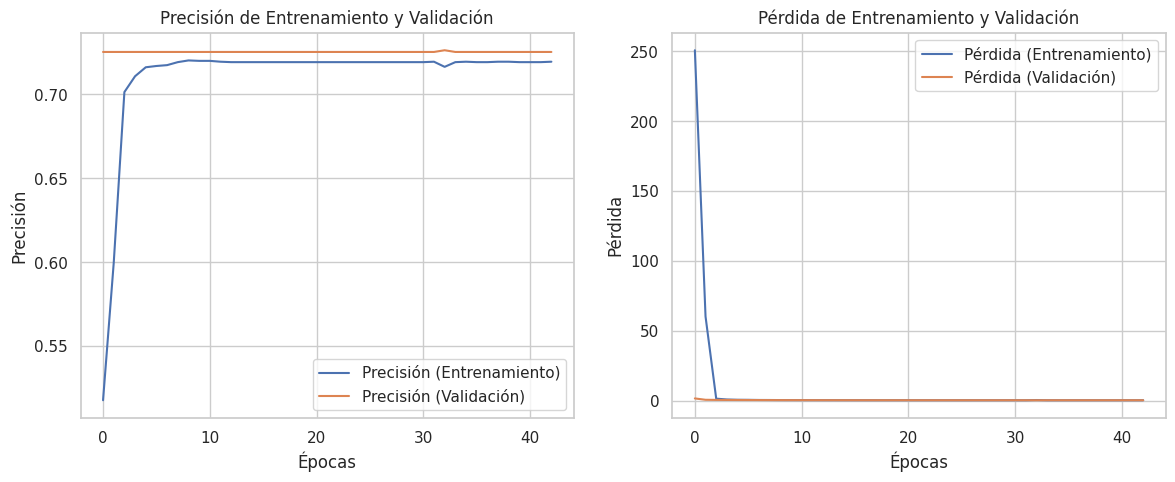

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001, verbose=1)


history = model.fit(X_train.astype(np.float32), y_train_encoded,
                    epochs=250,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

test_loss, test_accuracy = model.evaluate(X_test.astype(np.float32), y_test_encoded)
print(f"\nPrecisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Número de clases: {num_classes}")


acc = history.history.get('accuracy')
val_acc = history.history.get('val_accuracy')
loss = history.history.get('loss')
val_loss = history.history.get('val_loss')
epochs_range = range(len(acc if acc else val_acc if val_acc else loss if loss else val_loss))

plt.figure(figsize=(14, 5))

if acc and val_acc:
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Precisión (Entrenamiento)')
    plt.plot(epochs_range, val_acc, label='Precisión (Validación)')
    plt.legend(loc='lower right')
    plt.title('Precisión de Entrenamiento y Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')

if loss and val_loss:
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Pérdida (Entrenamiento)')
    plt.plot(epochs_range, val_loss, label='Pérdida (Validación)')
    plt.legend(loc='upper right')
    plt.title('Pérdida de Entrenamiento y Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')

if not (acc and val_acc and loss and val_loss):
    if acc and val_acc:
         plt.title('Precisión de Entrenamiento y Validación')
         plt.xlabel('Épocas'); plt.ylabel('Precisión')
    elif loss and val_loss:
        plt.title('Pérdida de Entrenamiento y Validación')
        plt.xlabel('Épocas'); plt.ylabel('Pérdida')

plt.show()

Pérdida en el conjunto de prueba: 0.7609
Precisión en el conjunto de prueba: 0.7201
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Reporte de Clasificación:
              precision    recall  f1-score   support

        baja       0.00      0.00      0.00        86
       media       0.72      1.00      0.84       885
        alta       0.00      0.00      0.00       258

    accuracy                           0.72      1229
   macro avg       0.24      0.33      0.28      1229
weighted avg       0.52      0.72      0.60      1229



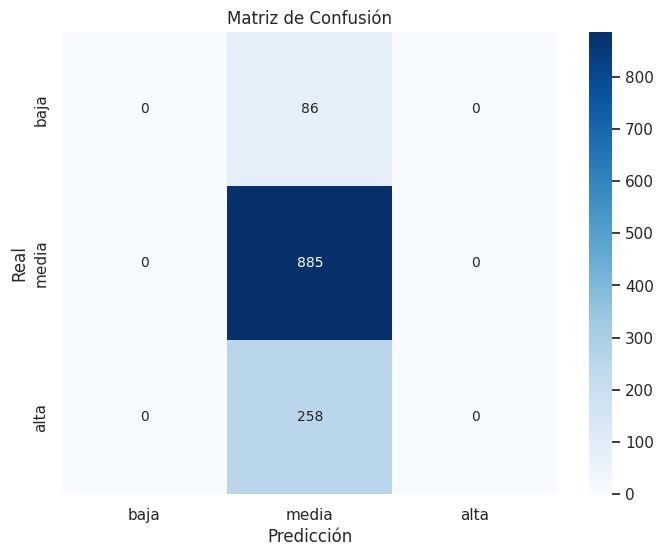

In [17]:
target_names = ['baja', 'media', 'alta']

X_test_np = X_test.astype(np.float32)

loss, accuracy = model.evaluate(X_test_np, y_test_encoded, verbose=0)
print(f"Pérdida en el conjunto de prueba: {loss:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")


y_pred_proba = model.predict(X_test_np)
y_pred_classes = np.argmax(y_pred_proba, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)


print("\nReporte de Clasificación:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names, zero_division=0))


cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()